# MINE4201- SR -  Laboratorio 1 
# Exploración modelos KNN



Vamos a utilizar las siguientes librerias en el laboratorio


In [35]:
!pip install "numpy>=1.25.0,<2.0.0"
!pip install scikit-surprise
!pip install pandas
!pip install matplotlib

In [36]:
pwd

'c:\\Users\\charr\\OneDrive\\Escritorio\\Laboratorio-1-Sistemas-de-Recomendacion\\lab01'

In [37]:
import os
import numpy as np
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import train_test_split
from surprise import KNNBasic
from surprise import accuracy
import random
import matplotlib.pyplot as plt

#Para garantizar reproducibilidad en resultados
seed = 10
random.seed(seed)
np.random.seed(seed)

## Suba al servidor los archivos u.data y u.item que se encuentran en el dataset descargado, en la pestaña files

In [38]:
if not (os.path.exists('u.data') and os.path.exists('u.item')):
    raise ValueError('Los archivos u.data e u.item no fueron encontrados en el path')
else:
    print("Los archivos han sido cargados")




Los archivos han sido cargados


In [39]:
ratings=pd.read_csv('u.data', sep = '\t', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ] )

In [40]:
items=pd.read_csv('u.item', sep = '\|', names = ['movie id' ,'movie title','release date','video release date','IMDb URL ','unknown',
                                                          'Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama',
                                                          'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western'], encoding='latin-1', engine='python' )

Verifique que los ratings y los items hayan sido cargados correctamente





In [41]:
#ratings.rating=ratings.rating.astype('category')
ratings.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [42]:
items.head()

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Visualice la distribución de ratings, ¿Qué puede decir al respecto?

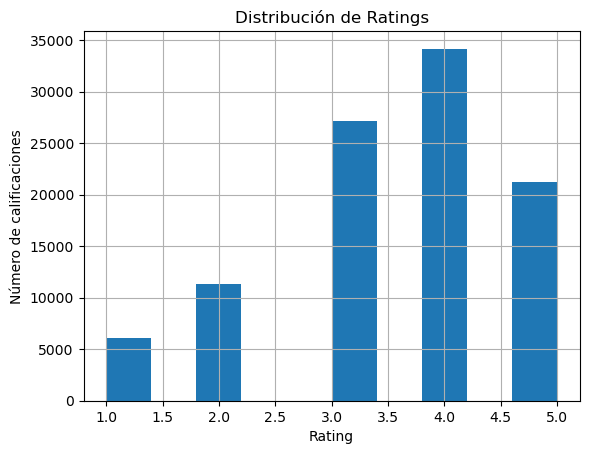

In [43]:

ratings['rating'].hist()

plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Número de calificaciones")

plt.show()


In [44]:
genre_col=list(items.columns[5:])
genre_col

['unknown',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [45]:
print(ratings.columns.tolist())
print(ratings.head(2))

['user_id', 'item_id', 'rating', 'timestamp']
   user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742


In [46]:
print(items.columns.tolist())
print(items.head(2))

['movie id', 'movie title', 'release date', 'video release date', 'IMDb URL ', 'unknown', 'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
   movie id       movie title release date  video release date  \
0         1  Toy Story (1995)  01-Jan-1995                 NaN   
1         2  GoldenEye (1995)  01-Jan-1995                 NaN   

                                           IMDb URL   unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...        0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...        0       1   

   Adventure  Animation  Children  ...  Fantasy  Film-Noir  Horror  Musical  \
0          0          1         1  ...        0          0       0        0   
1          1          0         0  ...        0          0       0        0   

   Mystery  Romance  Sci-Fi  Thriller  War  Western  
0

In [47]:
merged = ratings.merge(
    items[['movie id'] + genre_col],
    left_on='item_id',   # columna en ratings
    right_on='movie id', # columna en items
    how='left'
)
merged.head()

,user_id,item_id,rating,timestamp,movie id,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,242,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,186,302,3,891717742,302,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,22,377,1,878887116,377,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,244,51,2,880606923,51,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,166,346,1,886397596,346,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


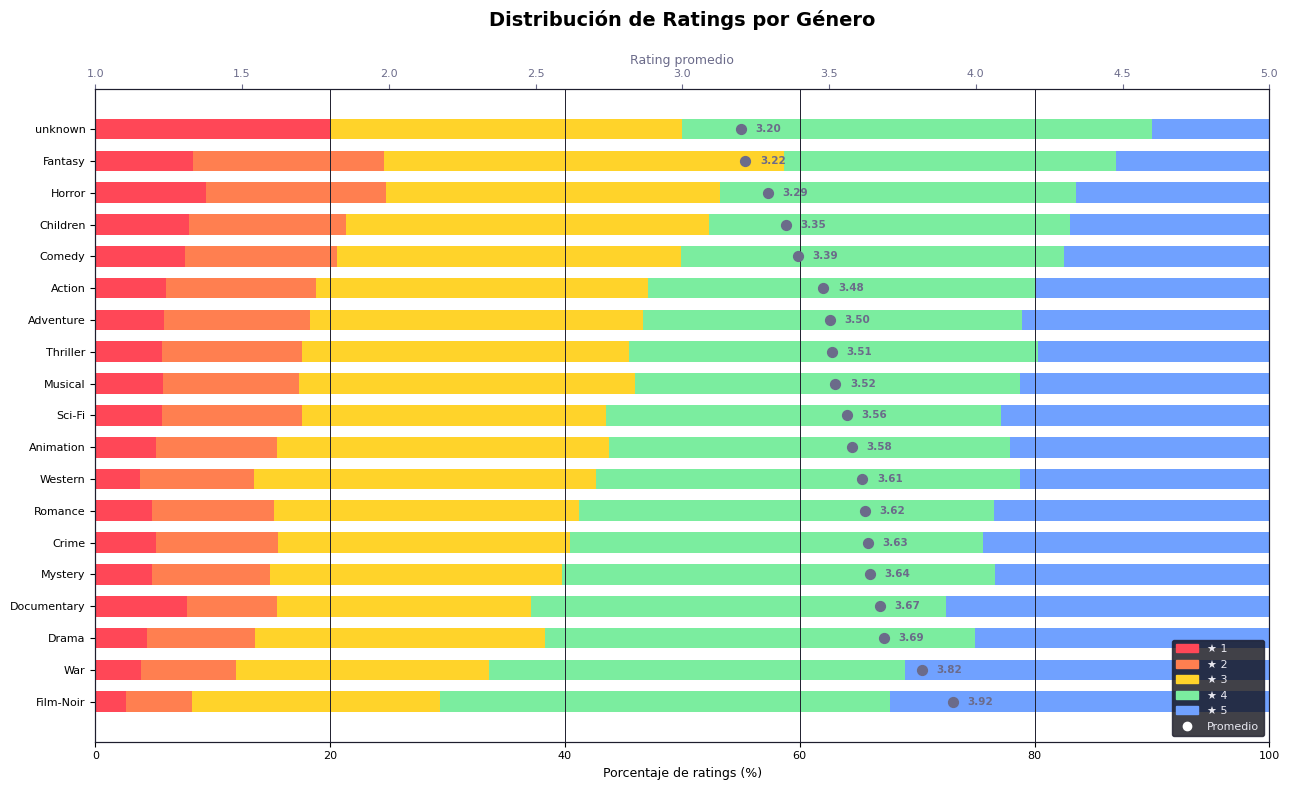

In [48]:

import matplotlib.patches as mpatches

# ── Calcular distribución por género ────────────────────────────────────────
rating_values = [1, 2, 3, 4, 5]
colors = ['#ff4757', '#ff7f50', '#ffd32a', '#7bed9f', '#70a1ff']


# Construir matriz: filas=géneros, columnas=rating 1-5 (en %)
matrix = []
means = []
for genre in genre_col:
    subset = merged.loc[merged[genre] == 1, 'rating']
    pcts = [subset[subset == r].count() / len(subset) * 100 for r in rating_values]
    matrix.append(pcts)
    means.append(subset.mean())

# Ordenar por rating promedio descendente
order = np.argsort(means)[::-1]
genres_sorted = [genre_col[i] for i in order]
matrix_sorted = [matrix[i] for i in order]
means_sorted  = [means[i] for i in order]

# ── Graficar ────────────────────────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(13, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

y = np.arange(len(genres_sorted))
bar_height = 0.65

# Barras apiladas horizontales
lefts = np.zeros(len(genres_sorted))
for i, (r, color) in enumerate(zip(rating_values, colors)):
    values = [row[i] for row in matrix_sorted]
    ax.barh(y, values, left=lefts, height=bar_height, color=color, label=f'★ {r}')
    lefts += np.array(values)

# Línea de promedio
ax2 = ax.twiny()
ax2.set_facecolor('black')
ax2.scatter(means_sorted, y, color='#6b6b8a', s=50, zorder=5, label='Promedio')
ax2.set_xlim(1, 5)
ax2.tick_params(colors='#6b6b8a', labelsize=8)
ax2.set_xlabel('Rating promedio', color='#6b6b8a', fontsize=9)

# Etiquetas de promedio
for i, (mean, yi) in enumerate(zip(means_sorted, y)):
    ax2.text(mean + 0.05, yi, f'{mean:.2f}', va='center', fontsize=7.5,
             color='#6b6b8a', fontweight='bold')

# Estética
ax.set_yticks(y)
ax.set_yticklabels(genres_sorted, color='#e8e8f0', fontsize=10)
ax.set_xlabel('Porcentaje de ratings (%)', color='#6b6b8a', fontsize=9)
ax.set_xlim(0, 100)
ax.tick_params(colors='#6b6b8a', labelsize=8)

for spine in ax.spines.values():
    spine.set_edgecolor('#1e1e2e')
for spine in ax2.spines.values():
    spine.set_edgecolor('#1e1e2e')

ax.xaxis.label.set_color('black')
ax.tick_params(axis='x', colors='black')
ax.tick_params(axis='y', colors='black')

ax.grid(axis='x', color='#1e1e2e', linewidth=0.7)

# Leyenda
legend_patches = [mpatches.Patch(color=c, label=f'★ {r}') for r, c in zip(rating_values, colors)]
dot = plt.Line2D([0], [0], marker='o', color='w', label='Promedio', markersize=6, linestyle='None')
ax.legend(handles=legend_patches + [dot], loc='lower right',
          facecolor='#12121a', edgecolor='#1e1e2e',
          labelcolor='#e8e8f0', fontsize=8)

plt.title('Distribución de Ratings por Género', color='black',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('rating_by_genre.png', dpi=150, bbox_inches='tight',
            facecolor='#0a0a0f')
plt.show()

## En la siguiente celda se esta calculando el número de ratings por usuario y  el promedio de sus calificaciones, el dataframe esta ordenado por el número de calificaciones

In [ ]:
num_calificaciones = ratings.groupby('user_id')['rating'].agg({'count','mean'}).sort_values(by='count', ascending=False)
num_calificaciones

,mean,count
user_id,,
405,1.834464,737
655,2.908029,685
13,3.097484,636
450,3.864815,540
276,3.465251,518
...,...,...
685,2.050000,20
475,3.600000,20
36,3.800000,20


In [50]:
ratings.groupby('user_id')['rating'].mean().reset_index()

,user_id,rating
0,1,3.610294
1,2,3.709677
2,3,2.796296
3,4,4.333333
4,5,2.874286
...,...,...
938,939,4.265306
939,940,3.457944
940,941,4.045455
941,942,4.265823


##Utilice las siguientes celdas para encontrar respuesta a las siguientes preguntas

¿Cómo es la distribución del número de ratings por usuario?

¿Cómo es la distribución del promedio de calificación por usuario?


In [51]:
plt.hist(num_calificaciones['count'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Número de calificaciones por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de calificaciones por usuario')
plt.show()

NameError: name 'num_calificaciones' is not defined

In [ ]:
plt.hist(num_calificaciones['mean'], bins=20, color='#70a1ff', edgecolor='#1e1e2e')
plt.xlabel('Rating promedio por usuario')
plt.ylabel('Frecuencia')
plt.title('Distribución del rating promedio por usuario')
plt.show()

##En la siguiente celda se esta calculando el número de ratings por items, el promedio de sus calificaciones y la varianza de sus calificaciones. 

In [ ]:
ratings.groupby('item_id')['rating'].agg({'count','mean','var'}).join(items['movie title'], how='left')

,mean,count,var,movie title
item_id,,,,
1,3.878319,452,0.860992,GoldenEye (1995)
2,3.206107,131,0.934116,Four Rooms (1995)
3,3.033333,90,1.470787,Get Shorty (1995)
4,3.550239,209,0.931358,Copycat (1995)
5,3.302326,86,0.895759,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
...,...,...,...,...
1678,1.000000,1,NaN,B. Monkey (1998)
1679,3.000000,1,NaN,Sliding Doors (1998)
1680,2.000000,1,NaN,You So Crazy (1994)


##Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

¿Cuáles son los items con más calificaciones?  

¿Se puede observar el fenomeno de cola larga en este dataset?




In [ ]:
mt=ratings.groupby('item_id')['rating'].agg({'count','mean','var'}).join(items['movie title'], how='left')

In [ ]:
mt

,mean,count,var,movie title
item_id,,,,
1,3.878319,452,0.860992,GoldenEye (1995)
2,3.206107,131,0.934116,Four Rooms (1995)
3,3.033333,90,1.470787,Get Shorty (1995)
4,3.550239,209,0.931358,Copycat (1995)
5,3.302326,86,0.895759,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
...,...,...,...,...
1678,1.000000,1,NaN,B. Monkey (1998)
1679,3.000000,1,NaN,Sliding Doors (1998)
1680,2.000000,1,NaN,You So Crazy (1994)


## Creación de listas de recomendación no personalizadas

Genere inicialmente una lista de recomendación de tamaño 10 no personalizada con los items con mejor promedio, en teoría estos son los mejores items del dataset.

¿Qué problemas tiene generar una lista no personalizada solamente con el promedio?

¿Es posible generar una mejor lista de recomendación teniendo en cuenta que tanto el número de ratings del item como su promedio?

Ver: 

http://www.evanmiller.org/how-not-to-sort-by-average-rating.html

https://es.wikipedia.org/wiki/Intervalo_de_confianza


In [ ]:
stats = ratings.groupby("item_id")["rating"].agg(["count","mean"])
stats.columns = ["v","R"]

C = ratings["rating"].mean()
m = stats["v"].quantile(0.70)

stats["score"] = (stats["v"]/(stats["v"]+m))*stats["R"] + (m/(stats["v"]+m))*C

top10 = stats.sort_values("score", ascending=False).head(10)
top10


,v,R,score
item_id,,,
318,298,4.466443,4.298735
50,583,4.358491,4.275372
64,283,4.445230,4.274255
483,243,4.456790,4.261172
12,267,4.385768,4.218195
603,209,4.387560,4.184091
98,390,4.289744,4.181189
127,413,4.283293,4.180839
174,420,4.252381,4.155548


In [ ]:
# para responder la primera el top-10 por promedio, varios ítems tienen muy pocas calificaciones, lo que evidencia sesgo por muestra pequeña.

stats2 = ratings.groupby("item_id")["rating"].agg(mean="mean", count="count").reset_index()

top_avg = stats2.sort_values("mean", ascending=False).head(10)
top_avg

,item_id,mean,count
813,814,5.0,1
1598,1599,5.0,1
1200,1201,5.0,1
1121,1122,5.0,1
1652,1653,5.0,1
1292,1293,5.0,3
1499,1500,5.0,2
1188,1189,5.0,3
1535,1536,5.0,1
1466,1467,5.0,2


# Creación del dataset de entrenamiento y prueba

El próximo paso es cargar los datos a surprise, para esto vamos a inicializar un modelo de datos de surprise con la información de los ratings cargados en el dataframe

In [ ]:
reader = Reader( rating_scale = ( 1, 5 ) )
#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df( ratings[ [ 'user_id', 'item_id', 'rating' ] ], reader )

Se divide el dataset en entrenamiento y test. El dataset de entrenamiento será presentado al algoritmo de recomendación y el dataset de test nos servirá para medir qué tan buenas fueron las predicciones del sistema de recomendación. El conjunto de test generado es una lista con los ratings de prueba

In [ ]:
train_set, test_set=  train_test_split(surprise_dataset, test_size=.2)

In [ ]:
train_set.n_ratings

80000

In [ ]:
len(test_set)

20000

In [ ]:
#Este es el primer elemento del dataset de prueba (usuario 154, pelicula 302, rating 4)
test_set[0]

(154, 302, 4.0)

## Creación de modelo de filtrado colaborativo basado en similitud con usuarios o items cercanos

Surprise cuenta con la implementación de los modelos colaborativos dentro de la clase [KNNBasic](https://surprise.readthedocs.io/en/stable/knn_inspired.html) 

El modelo recibe los siguientes parámetros: 


*   k: El máximo número de vecinos con el que se hará la extrapolación
*   min_k : El mínimo número de vecinos con el que se extrapolará un rating
*   sim_options : Opciones de similitud pasadas como un diccionario de python, aqui se le configura al modelo el tipo de similitud a usar para encontrar los vecinos y si la extrapolación debe hacerse usando usuarios o items similares. Revise el formato y similitudes disponibles en surprise en [este link](https://surprise.readthedocs.io/en/stable/prediction_algorithms.html#similarity-measure-configuration)





In [ ]:
# se crea un modelo knnbasic item-item con similitud coseno 
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)

In [ ]:
#Se le pasa la matriz de utilidad al algoritmo 
algo.fit(trainset=train_set)

Computing the cosine similarity matrix...
Done computing similarity matrix.


Una vez cargados los ratings al modelo, se puede realizar una predicción para un usuario, en este caso vamos a calcular la predicción que el modelo esta realizando para la primera entrada del dataset de test la predicción para el usuario con id 154 y el item con id 302, que corresponde a la película L.A. Confidential (1997)

---



In [ ]:
#Verifique la propiedad est de la predicción
algo.predict(154,302)

Prediction(uid=154, iid=302, r_ui=None, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False})

In [ ]:
items[items['movie id']==302]

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
301,302,L.A. Confidential (1997),01-Jan-1997,NaN,http://us.imdb.com/M/title-exact?L%2EA%2E+Conf...,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,0


Como podemos ver, la predicción (4.24) del modelo no esta alejada de lo que realmente opinó el usuario  (4.0)

Para medir la calidad de la predicción para todos los usuarios e items del dataset de prueba, vamos a comparar lo que dice el modelo de predicción vs lo que dice el conjunto de prueba, para esto vamos a usar la métrica [RMSE](https://surprise.readthedocs.io/en/stable/accuracy.html#surprise.accuracy.rmse)

Inicialmente calculamos la predicción para todos los elementos del conjunto de test

In [ ]:
test_predictions=algo.test(test_set)

In [ ]:
#5 primeras predicciones
test_predictions[0:5]

[Prediction(uid=154, iid=302, r_ui=4.0, est=4.249202065377386, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=896, iid=484, r_ui=4.0, est=2.8976616922320964, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=230, iid=371, r_ui=4.0, est=4.1968378983432535, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=234, iid=294, r_ui=3.0, est=3.0978778071364186, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=25, iid=729, r_ui=4.0, est=4.148885433441103, details={'actual_k': 20, 'was_impossible': False})]

Ahora se mide el RMSE de las predicciones vs el valor del dataset

In [ ]:
# En promedio, el sistema encuentra ratings que estan una estrella por encima o por debajo del rating del usuario
accuracy.rmse( test_predictions, verbose = True )

RMSE: 1.0453


1.0453343976192102

## Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

¿Cuál es el RMSE de un modelo usuario-usuario con los mismos parámetros de similitud?

¿Cuál es el efecto de cambiar el número de vecinos en la calidad del modelo usuario-usuario ?

In [ ]:
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(train_set)
test_predictions = algo.test(test_set)
accuracy.rmse(test_predictions, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0166


1.0166414414593592

In [ ]:
sim_options = {'name': 'cosine', 'user_based': True}
algo = KNNBasic(k=100, min_k=2, sim_options=sim_options)
algo.fit(train_set)
test_predictions = algo.test(test_set)
accuracy.rmse(test_predictions, verbose=True)


Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 1.0113


1.0113077032099977

En este caso con los 5 vecinos más cercanos el rsme aumentó significativamente, siendo mayor que cuando se realizó con 20 vecinos o con el modelo item-item.

Por otro lado, al aumentar levemente el valor de k de 20 a 100 vecinos, mejoraron las predicciones al tener un RMSE menor. No obstante, el subir demasiado este valor, podría llegar a tener el efecto contrario respecto al RMSE y las predicciones.


## Generando listas de predicciones para los usuarios

Retomemos nuestro modelo inicial y ajustémolo con todos los ratings disponibles

Para generar una lista de recomendación se debe crear un dataset de "test" con las entradas faltantes de la matriz utilidad para que el modelo cree las predicciones (terminar de llenar la matriz de utilidad)



In [ ]:
#Se crea el dataset para modelo 
rating_data=surprise_dataset.build_full_trainset()
# Se crea dataset de "prueba" con las entradas faltantes para generar las predicciones
test=rating_data.build_anti_testset()

# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#10 primeras predicciones
predictions[0:10]

[Prediction(uid=196, iid=302, r_ui=3.52986, est=3.4998074068929244, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=377, r_ui=3.52986, est=3.531852919263047, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=51, r_ui=3.52986, est=3.59549677885145, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=346, r_ui=3.52986, est=3.5471070543165877, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=474, r_ui=3.52986, est=3.7990088769026116, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=265, r_ui=3.52986, est=3.4464297466659812, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=465, r_ui=3.52986, est=3.5022156502733557, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=451, r_ui=3.52986, est=3.6948301041629965, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=86, r_ui=3.52986, e

In [ ]:
#Predicciones para usuario 196
user_predictions=list(filter(lambda x: x[0]==196,predictions))

In [ ]:
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)

In [ ]:
#tomamos las 10 primeras predicciones
user_predictions=user_predictions[0:10]

In [ ]:
user_predictions

[Prediction(uid=196, iid=1309, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1310, r_ui=3.52986, est=4.5, details={'actual_k': 4, 'was_impossible': False}),
 Prediction(uid=196, iid=1676, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1675, r_ui=3.52986, est=4.25, details={'actual_k': 8, 'was_impossible': False}),
 Prediction(uid=196, iid=1289, r_ui=3.52986, est=4.202435603862276, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1643, r_ui=3.52986, est=4.097225899300029, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1593, r_ui=3.52986, est=4.090909090909091, details={'actual_k': 11, 'was_impossible': False}),
 Prediction(uid=196, iid=935, r_ui=3.52986, est=4.05136705364539, details={'actual_k': 20, 'was_impossible': False}),
 Prediction(uid=196, iid=1216, r_ui=3.52986, est=4.0506920732628675, details={'actual_k': 20, 'was_i

In [ ]:
#Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)

In [ ]:
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,1309,4.500000,"Very Natural Thing, A (1974)",http://us.imdb.com/M/title-exact?Very%20Natura...
1,1310,4.500000,"Walk in the Sun, A (1945)",http://us.imdb.com/M/title-exact?Walk%20in%20t...
2,1676,4.250000,"War at Home, The (1996)",http://us.imdb.com/M/title-exact?War%20at%20Ho...
3,1675,4.250000,"Sunchaser, The (1996)","http://us.imdb.com/M/title-exact?Sunchaser,%20..."
4,1289,4.202436,Jack and Sarah (1995),http://us.imdb.com/M/title-exact?Jack%20and%20...
5,1643,4.097226,Angel Baby (1995),http://us.imdb.com/Title?Angel+Baby+(1995/I)
6,1593,4.090909,Death in Brunswick (1991),http://us.imdb.com/M/title-exact?Death%20in%20...
7,935,4.051367,Paradise Road (1997),http://us.imdb.com/M/title-exact?Paradise%20Ro...
8,1216,4.050692,Kissed (1996),http://us.imdb.com/M/title-exact?Kissed%20%281...
9,1312,4.049247,"Pompatus of Love, The (1996)",http://us.imdb.com/M/title-exact?Pompatus%20of...


## Utilice las siguientes celdas para encontrar la respuesta a las siguientes preguntas

Cree al menos 2 usuarios (al primero asígnele el id 944) y cree para cada usuario ratings nuevos (puede hacerlo haciendo a traves del [dataframe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html), o añadiendo líneas al archivo). Asigne a un usuario preferencias de un segmento popular (mainstream) y a otro preferencias de un nicho.

¿Que tan bien cree que el sistema esta respondiendo a los gustos del usuario?

¿Que tan bien cree que el sistema esta respondiendo al objetivo de buscar items para el usuario dentro de la cola larga?

In [ ]:
ratings['user_id'].max()+1

944

#### Peliculas mas populares
Para tratar de encontrar las peliculas mas populares y mas de nicho se tendra solo en cuenta la cantidad de ratings que tiene cada pelicula. Se separa por generos para hacer la busqueda mas facil

In [ ]:
# Popularity = count of ratings per movie
movie_popularity = ratings.groupby('item_id').agg(n_ratings=('rating', 'count')).reset_index()
# Merge with items to get genres and title
items_with_pop = items.merge(movie_popularity, left_on='movie id', right_on='item_id', how='left')

# Genre columns (exclude 'unknown')
genre_cols = ['Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama',
              'Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

# Top 10 most popular movies per genre
for genre in genre_cols:
    subset = items_with_pop[items_with_pop[genre] == 1].copy()
    subset = subset.sort_values('n_ratings', ascending=False).head(10)

    print(f"\n=== {genre} (top 10 by number of ratings) ===")
    print(subset[['movie id', 'movie title', 'n_ratings']].to_string(index=False))


=== Action (top 10 by number of ratings) ===
 movie id                     movie title  n_ratings
       50                Star Wars (1977)        583
      181       Return of the Jedi (1983)        507
      300            Air Force One (1997)        431
      121   Independence Day (ID4) (1996)        429
      174  Raiders of the Lost Ark (1981)        420
      127           Godfather, The (1972)        413
      117                Rock, The (1996)        378
      172 Empire Strikes Back, The (1980)        367
      222 Star Trek: First Contact (1996)        365
      313                  Titanic (1997)        350

=== Adventure (top 10 by number of ratings) ===
 movie id                                  movie title  n_ratings
       50                             Star Wars (1977)        583
      181                    Return of the Jedi (1983)        507
      174               Raiders of the Lost Ark (1981)        420
      117                             Rock, The (1996)    

In [ ]:
# Top 10 least popular movies per genre
for genre in genre_cols:
    subset = items_with_pop[items_with_pop[genre] == 1].copy()
    subset = subset.sort_values('n_ratings', ascending=True).head(10)

    print(f"\n=== {genre} (top 10 by number of ratings) ===")
    print(subset[['movie id', 'movie title', 'n_ratings']].to_string(index=False))


=== Action (top 10 by number of ratings) ===
 movie id                                       movie title  n_ratings
     1673                                     Mirage (1995)          1
      830                                   Power 98 (1995)          1
     1364                               Bird of Prey (1996)          1
     1414                                Coldblooded (1995)          1
     1548                              The Courtyard (1995)          1
     1559                         Hostile Intentions (1994)          1
     1586                             Lashou shentan (1992)          1
     1595                                   Shopping (1994)          1
      599 Police Story 4: Project S (Chao ji ji hua) (1993)          1
     1613                                 Tokyo Fist (1995)          1

=== Adventure (top 10 by number of ratings) ===
 movie id                                    movie title  n_ratings
     1515                        Wings of Courage (1995)

A continuacion se crean los ratings de dos usuarios: 

In [ ]:
# New ratings for user 944 (popular) and 945 (niche). Columns: user_id, item_id, rating
new_ratings_data = [
    (944, 50, 4),    # Star Wars
    (944, 181, 5),   # Return of the Jedi
    (944, 121, 3),   # Independence Day
    (944, 127, 5),   # The Godfather
    (944, 98, 2),    # Silence of the Lambs
    (944, 56, 3),    # Pulp Fiction
    (944, 755, 3),   # Jumanji
    (944, 288, 4),   # Scream
    (944, 185, 2),   # Jaws
    (944, 11, 5),    # Seven
    (944, 273, 4),   # Heat
    (945, 247, 3),   # Turbo: A Power Rangers Movie
    (945, 1219, 5),  # Goofy Movie
    (945, 1293, 4),  # Star Kid
    (945, 1523, 1),  # Good Man in Africa, A
    (945, 1336, 3),  # Kazaam
    (945, 1292, 4),  # Simple Wish, A
    (945, 1576, 3),  # Hungarian Fairy Tale, A
    (945, 1274, 5),  # Robocop 3
]
new_ratings_df = pd.DataFrame(new_ratings_data, columns=['user_id', 'item_id', 'rating'])
# Match original schema: add timestamp (placeholder)
new_ratings_df['timestamp'] = 0
ratings = pd.concat([ratings, new_ratings_df], ignore_index=True)
ratings.tail(21)

,user_id,item_id,rating,timestamp
99998,13,225,2,882399156
99999,12,203,3,879959583
100000,944,50,4,0
100001,944,181,5,0
100002,944,121,3,0
100003,944,127,5,0
100004,944,98,2,0
100005,944,56,3,0
100006,944,755,3,0
100007,944,288,4,0


In [ ]:
#Procedemos a volver a cargar el dataset para incluir los nuevos user

reader = Reader( rating_scale = ( 1, 5 ) )
#Se crea el dataset a partir del dataframe
surprise_dataset = Dataset.load_from_df( ratings[ [ 'user_id', 'item_id', 'rating' ] ], reader )

rating_data=surprise_dataset.build_full_trainset()

test=rating_data.build_anti_testset()

# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': False  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#Predicciones para usuario 944 -> Gustos populares
user_predictions=list(filter(lambda x: x[0]==944,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)
#tomamos las 20 primeras predicciones
user_predictions=user_predictions[0:15]
 #Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,1414,4.666667,Coldblooded (1995),http://us.imdb.com/M/title-exact?Coldblooded%2...
1,1243,4.503778,Night Flier (1997),http://us.imdb.com/M/title-exact?Night+Flier+(...
2,1127,4.502327,"Truman Show, The (1998)","http://us.imdb.com/Title?Truman+Show,+The+(1998)"
3,1191,4.500000,"Letter From Death Row, A (1998)",http://us.imdb.com/M/title-exact?Letter+From+D...
4,1662,4.500000,Rough Magic (1995),http://us.imdb.com/M/title-exact?Rough%20Magic...
5,1669,4.500000,MURDER and murder (1996),http://us.imdb.com/M/title-exact?MURDER+and+mu...
6,1663,4.500000,Nothing Personal (1995),http://us.imdb.com/M/title-exact?Nothing%20Per...
7,1666,4.500000,Ripe (1996),http://us.imdb.com/M/title-exact?Ripe%20%28199...
8,1668,4.500000,Wedding Bell Blues (1996),http://us.imdb.com/M/title-exact?Wedding%20Bel...
9,1665,4.500000,"Brother's Kiss, A (1997)",http://us.imdb.com/M/title-exact?Brother%27s%2...


In [ ]:
#Predicciones para usuario 945 -> Gustos de Nicho
user_predictions=list(filter(lambda x: x[0]==945,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)
#tomamos las 20 primeras predicciones
user_predictions=user_predictions[0:15]
 #Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,478,5.000000,"Philadelphia Story, The (1940)",http://us.imdb.com/M/title-exact?Philadelphia%...
1,612,5.000000,Lost Horizon (1937),http://us.imdb.com/M/title-exact?Lost%20Horizo...
2,589,5.000000,"Wild Bunch, The (1969)","http://us.imdb.com/M/title-exact?Wild%20Bunch,..."
3,602,5.000000,"American in Paris, An (1951)",http://us.imdb.com/M/title-exact?American%20in...
4,1157,5.000000,"Relic, The (1997)","http://us.imdb.com/M/title-exact?Relic,%20The%..."
5,1314,5.000000,Surviving the Game (1994),http://us.imdb.com/M/title-exact?Surviving%20t...
6,1172,5.000000,"Women, The (1939)","http://us.imdb.com/M/title-exact?Women,%20The%..."
7,503,5.000000,"Candidate, The (1972)","http://us.imdb.com/M/title-exact?Candidate,%20..."
8,1459,5.000000,Madame Butterfly (1995),http://us.imdb.com/M/title-exact?Madame%20Butt...
9,1543,5.000000,Johns (1996),http://us.imdb.com/M/title-exact?Johns%20(1996)


### Creacion de un modelo user based para realizar la comparacion:

In [ ]:
# se crea el mismo modelo que el del ejemplo
sim_options = {'name': 'cosine',
               'user_based': True  # calcule similitud item-item
               }
algo = KNNBasic(k=20, min_k=2, sim_options=sim_options)
algo.fit(rating_data)
predictions=algo.test(test)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [ ]:
#Predicciones para usuario 944 -> Gustos populares
user_predictions=list(filter(lambda x: x[0]==944,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)
#tomamos las 20 primeras predicciones
user_predictions=user_predictions[0:15]
 #Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,1189,5.000000,Prefontaine (1997),http://us.imdb.com/M/title-exact?Prefontaine%2...
1,1500,5.000000,Santa with Muscles (1996),http://us.imdb.com/M/title-exact?Santa%20with%...
2,1293,5.000000,Star Kid (1997),http://us.imdb.com/M/title-exact?imdb-title-12...
3,1467,5.000000,"Saint of Fort Washington, The (1993)",http://us.imdb.com/M/title-exact?Saint%20of%20...
4,318,4.650755,Schindler's List (1993),http://us.imdb.com/M/title-exact?Schindler's%2...
5,963,4.650162,Some Folks Call It a Sling Blade (1993),http://us.imdb.com/M/title-exact?Some%20Folks%...
6,187,4.600811,"Godfather: Part II, The (1974)",http://us.imdb.com/M/title-exact?Godfather:%20...
7,603,4.600342,Rear Window (1954),http://us.imdb.com/M/title-exact?Rear%20Window...
8,251,4.599729,Shall We Dance? (1996),http://us.imdb.com/M/title-exact?Shall%20we%20...
9,114,4.597355,Wallace & Gromit: The Best of Aardman Animatio...,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...


In [ ]:
#Predicciones para usuario 945 -> Gustos de Nicho
user_predictions=list(filter(lambda x: x[0]==945,predictions))
#Ordenamos de mayor a menor estimación de relevancia
user_predictions.sort(key=lambda x : x.est, reverse=True)
#tomamos las 20 primeras predicciones
user_predictions=user_predictions[0:15]
 #Se convierte a dataframe
labels = ['movie id', 'estimation']
df_predictions = pd.DataFrame.from_records(list(map(lambda x: (x.iid, x.est) , user_predictions)), columns=labels)
#Lo unimos con el dataframe de películas
df_predictions.merge(items[['movie id','movie title','IMDb URL ']], how='left', on='movie id')

,movie id,estimation,movie title,IMDb URL
0,612,5.000000,Lost Horizon (1937),http://us.imdb.com/M/title-exact?Lost%20Horizo...
1,481,5.000000,"Apartment, The (1960)","http://us.imdb.com/M/title-exact?Apartment,%20..."
2,966,5.000000,"Affair to Remember, An (1957)",http://us.imdb.com/M/title-exact?Affair%20to%2...
3,1612,5.000000,"Leading Man, The (1996)",http://us.imdb.com/M/title-exact?imdb-title-11...
4,114,4.816718,Wallace & Gromit: The Best of Aardman Animatio...,http://us.imdb.com/Title?Wallace+%26+Gromit%3A...
5,474,4.726916,Dr. Strangelove or: How I Learned to Stop Worr...,http://us.imdb.com/M/title-exact?Dr.%20Strange...
6,603,4.669848,Rear Window (1954),http://us.imdb.com/M/title-exact?Rear%20Window...
7,166,4.669551,Manon of the Spring (Manon des sources) (1986),http://us.imdb.com/M/title-exact?Manon%20des%2...
8,589,4.666667,"Wild Bunch, The (1969)","http://us.imdb.com/M/title-exact?Wild%20Bunch,..."
9,837,4.666667,Meet John Doe (1941),http://us.imdb.com/M/title-exact?Meet%20John%2...
